In [195]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as smf

pd.set_option('display.max_columns', 500)


%matplotlib inline

In [196]:
data16 = pd.read_csv('E:/Transit-Casa-Alex/Output/Modeling/2016/Tenth_Data_rs_day.csv',thousands = ',')
data_4 = pd.read_csv('E:/Transit-Casa-Alex/Output/Modeling/2009/Third_Data_rs_day.csv',thousands = ',')
data_3 = pd.read_csv('E:/Transit-Casa-Alex/Output/Modeling/2009/Quarter_Data_rs_day.csv',thousands = ',')

In [197]:
data16.head()

,Unnamed: 0,MONTH,DOW_x,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE_x,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT_x,STOP_LON_x,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,DOW_y,ROUTE_TYPE_y,STOP_LAT_y,STOP_LON_y,geometry,index_right,ALAND,AWATER,COUNTYFP,NAME,TRACTCE,Id,Id2,Geography,POP_ACS,HU_ACS,VAC_RATE,OCC_RATE,INC_0_15,INC_15_50,INC_50_100,INC_100P,HH_SIZE,HH_0VEH,POPDEN_ACS,HH_DEN_ACS,HU_DEN_ACS,geometry_a,Average Hourly Price,parking_rate,PRICE1HR,PRICE2HR,PRICE3HR,PRICE4HR,PRICE12HR,PRICEDAY,PRICEDAYDISCOUNT,BART_TOS,BART_FROMS,CALTRAIN_ON,CALTRAIN_OFF,MUNI_RAIL_BOARDINGS,MUNI_RAIL_ALIGHTINGS,BIKE_ALIGHTINGS,BIKE_DOCKCOUNT,BIKE_BOARDINGS,EDHLTH_RAC_SCALED,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,EMP_WAC_SCALED,LEISER_RAC_SCALED,LEISER_WAC_SCALED,OTHER_RAC_SCALED,OTHER_WAC_SCALED,RETAIL_RAC_SCALED,RETAIL_WAC_SCALED,HOUSING16_SCALED,NUM_BUS_STOPS,Count_,DOW,FID_1,ROUTE_TYPE,STOP_LAT,STOP_LON,geometry_e,EDD_EMP,geometry_f
0,0,2016-10-01,1,SFMTA,1,0,1,21,20.0,219,40,0.0,222.533704,4015,CALIFORNIA,3,GEARY + 33RD AVENUE,8.636479,2.5,CLAY ST & DRUMM ST,CLAY ST&DRUMM ST SW-NS/BZ,37.795436,-122.396819,0,1,1.0,-5.763104,-0.612554,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000,0.000000,0.00,0.00,0.00,0.00,0.690428,634.155272,0.000000,87.823185,721.978457,0.000000,0.000000,41.335690,1585.388179,543.119919,86.163085,196.901430,815.622045,4.525653,0.000000,2779.2,0.006256,0.000000,0.000000,1.0,3.0,37.795436,-122.396819,POINT (-122.3968190000009 37.79543600000024),77.0,683597.0,494314.0,75.0,105.0,10500.0,1400000US06075010500,6.075010e+09,"Census Tract 105, San Francisco County, Califo...",2589.0,1969.0,0.196546,0.803454,0.133375,0.182680,0.163085,0.520860,1.636536,0.365360,15.326760,9.365367,11.656389,POINT (6013633.691743724 2117652.194619433),385.0,NaN,1200.0,2400.0,3200.0,3200.0,3200.0,3200.0,2373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.532705,68.710960,161.102580,6830.473258,17.076241,853.710819,110.603613,5762.028754,11.890020,146.022725,252.843469,1.0,0.0,1.0,721.0,3.0,37.795436,-122.396819,POLYGON ((-122.3949920176691 37.79546537424562...,2383.0,POLYGON ((-122.3949920176691 37.79546537424562...
1,1,2016-10-01,1,SFMTA,1,0,2,21,20.0,219,40,0.0,222.533704,6294,CALIFORNIA,3,GEARY + 33RD AVENUE,8.634744,2.5,SACRAMENTO ST & DAVIS ST,SACRAMENTO ST&DAVIS ST NE-NS,37.794500,-122.397610,0,0,0.0,-0.348136,0.079435,0.0,94.618710,245.09,304.493813,245.09,399.112523,17.082,17.130279,4.18,3.38,4.18,2.58,0.791301,1646.049097,87.327495,755.992840,2314.714442,58.967442,34.796845,103.519936,4115.122743,2185.296441,1581.572955,837.178968,429.557045,0.580874,0.166667,2776.2,0.054245,0.000000,0.000000,1.0,3.0,37.794500,-122.397610,POINT (-122.39761 37.79449999999998),77.0,683597.0,494314.0,75.0,105.0,10500.0,1400000US06075010500,6.075010e+09,"Census Tract 105, San Francisco County, Califo...",2589.0,1969.0,0.196546,0.803454,0.133375,0.182680,0.163085,0.520860,1.636536,0.365360,15.326760,9.365367,11.656389,POINT (6013398.275404719 2117316.07903475),385.0,NaN,1200.0,2400.0,3200.0,3200.0,3200.0,3200.0,2373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.078237,99.224205,125.874592,12486.255013,9.616092,1092.822213,80.841418,11079.260320,15.338846,214.948275,1.000000,4.0,0.0,1.0,2400.0,3.0,37.794500,-122.397610,POLYGON ((-122.3957830410079 37.79452938650429...,11491.0,POLYGON ((-122.3957830410079 37.79452938650429...
2,2,2016-10-01,1,SFMTA,1,0,3,21,20.0,219,40,0.0,222.533704,6290,CALIFORNIA,3,GEARY + 33RD AVENUE,8.632826,2.5,SACRAMENTO ST & BATTERY ST,SACRAMENTO ST&BATTERY ST NW-,37.794180,-122.400282,0,0,0.0,0.443998,0.676318,0.0,51.236908,273.99,354.870766,27

In [198]:
estimate = data16
drop = ['Unnamed: 0',
'STOP_LAT_x',
'STOP_LON_x',
'STOP_LAT_y',
'STOP_LON_y',
'geometry',
'index_right',
'Id',
'Id2',
'Geography',
'geometry_a',
'geometry_e',
'geometry_f',
'STOP_LAT',
'STOP_LON',
'FID_1']

change = ['BART_FROMS','BART_TOS','MUNI_RAIL_ALIGHTINGS','MUNI_RAIL_BOARDINGS','CALTRAIN_OFF','CALTRAIN_ON','NUM_BUS_STOPS']

change2 = ['Average Hourly Price',
'Count_',
'EDHLTH_RAC_SCALED',
'EDHLTH_WAC_SCALED',
'EMP_RAC_SCALED',
'EMP_WAC_SCALED',
'HOUSING16_SCALED',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'OTHER_RAC_SCALED',
'OTHER_WAC_SCALED',
'HH_0VEH',
'INC_0_15',
'INC_100P',
'INC_15_50',
'INC_50_100',
'PRICE12HR',
'PRICE1HR',
'PRICE2HR',
'PRICE3HR',
'PRICE4HR',
'PRICEDAY',
'PRICEDAYDISCOUNT',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'parking_rate']

changes = ['PARK_HOURLY_AVG_ON',
'TRANSBAY',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'HOUSING_16_DEN',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'PARK_12_HR_OFF_PUB',
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'PARK_DAY_OFF_PUB',
'PARK_DAY_DISCOUNT_OFF_PUB',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'PARKING_RATE_OFF_RESIDENTIAL']




look = ['EMP_WAC_DEN','LEISER_RAC_DEN','LEISER_WAC_DEN','OTHER_RAC_DEN','OTHER_WAC_DEN','RETAIL_RAC_DEN','RETAIL_WAC_DEN','ON']

log_change = ['PARK_12_HR_OFF_PUB',
'BIKE_BOARDINGS',
'BIKE_ALIGHTINGS',
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'AVG_BART',
'BART_FROMS',
'BIKE_AVG',
'BART_TOS',
'CALTRAIN_AVG',
'CALTRAIN_OFF',
'CALTRAIN_ON',
'CAPACITY',
'CROWDED',
'CROWDHOURS',
'PARK_DAY_DISCOUNT_OFF_PUB',
'PARK_DAY_OFF_PUB',
'DWELL',
'DWELL_S',
'EDD_EMP',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'FARE',
'FREQ_S',
'FULLFARE_REV',
'HEADWAY_S',
'HH_DEN_ACS',
'PARK_HOURLY_AVG_ON',
'HOUSING_16_DEN',
'HU_DEN_ACS',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'MUNI_RAIL_ALIGHTINGS',
'MUNI_RAIL_AVG',
'MUNI_RAIL_BOARDINGS',
'NUM_BUS_STOPS',
'OCC_RATE',
'OFF',
'ON',
'ONTIME5',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'PARKING_RATE_OFF_RESIDENTIAL',
'PASSDELAY_ARR',
'PASSDELAY_DEP',
'PASSHOURS',
'PASSMILES',
'RDBRDNGS',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'RUNSPEED',
'RUNSPEED_S',
'RUNTIME',
'RUNTIME_S',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'TOTSPEED',
'TOTSPEED_S',
'TOTTIME',
'TOTTIME_S',
'VAC_RATE',
'VC',
'WAITHOURS']


def rename_column(old_columns,new_columns,df):
    num = len(old_columns)
    count = 0
    while count < num:
        df[new_columns[count]] = df[old_columns[count]]
        df = df.drop(old_columns[count],axis = 1)
        
        count = count + 1
    return df
    
    
def check(value):
    if value == 'N':
        value = ''
    else:
        value = value
    return value
    
    

estimate['FREQ_S'] = 1 / (estimate['HEADWAY_S'] / 60.0)
estimate['NUM_BUS_STOPS'] = estimate['NUM_BUS_STOPS'] - 1






estimate.RUNSPEED = estimate.RUNSPEED.clip(upper = 40)
estimate.RUNSPEED = estimate.TOTSPEED.clip(upper = 40)

estimate = estimate.drop(drop,axis = 1)

for column in change:
    estimate[column] = estimate[column].fillna(0)
    

for column in estimate.columns.sort_values():
    print(column)
estimate = rename_column(change2,changes,estimate)

estimate['EXCLUDE'] = 0
count = 0
for column in look:
    while count < len(estimate[column]):
        if np.isnan(estimate[column][count]):
                print('Got One')
                estimate['EXCLUDE'][count] = 1
        count = count + 1
        
data = estimate[estimate['EXCLUDE'] == 0]        

data['AVG_RIDE'] = (data.ON + data.OFF)/2
data['LOG_RIDERS'] = np.log(data.AVG_RIDE + 1)

data['AVG_BART'] = (data['BART_FROMS']+data['BART_TOS'])/2
data['CALTRAIN_AVG'] = (data.CALTRAIN_OFF + data.CALTRAIN_ON)/2
data['MUNI_RAIL_AVG'] = (data.MUNI_RAIL_ALIGHTINGS + data.MUNI_RAIL_BOARDINGS)/2
data['BIKE_AVG'] = (data.BIKE_ALIGHTINGS + data.BIKE_BOARDINGS)/2


def check_inf(row):
    if row['FREQ_S'] == np.inf:
        row['FREQ_S'] = np.nan
    else:
        row['FREQ_S'] = row['FREQ_S']
    return row

data = data.apply(lambda x: check_inf(x),axis = 1)



for column in log_change:
    data[column + '_LOG'] = data[column].apply(lambda value: np.log(value + 1))
    

data['DIST_FROM_LAST_STOP'] = data['SERVMILES_S'] / (data['FREQ_S']*24)

data['DIST_FROM_LAST_STOP_LOG'] = data['DIST_FROM_LAST_STOP'].apply(lambda value: np.log(value + 1))

data['SERVMILES_S_LOG'] = data['SERVMILES_S'].apply(lambda x : np.log(x + 1))
    
data['EOL_SOL'] = data['EOL'] + data['SOL']

data['CAL_STATION'] = np.where(data['CALTRAIN_AVG'] > 0,1,0)
data['CLOSE_STOP'] = np.where(data['DIST_FROM_LAST_STOP'] < 0.2, 1,0)

data['LIMITED'] = 0
data['EXPRESS'] = 0

express = ['016AX',
'016BX',
'1AX',
'1BX',
'14X',
'30X',
'31AX',
'31BX',
'38AX',
'38BX',
'9AX',
'9BX',
'16X',
'80X',
'81X',
'82X',
'8AX',
'8BX',
'8X',]



limited = ['14R',
'28R',
'38R',
'71R',
'9R',]

def set_routes(row,limited,express):
    """
    function that uses the .apply(lambda x: ) method to set a dummy variable for limited and express routes. Must have
    dummy variable column names already filled with zeros.
    
    """
    
    for column in limited:
        if row['ROUTE_SHORT_NAME'] == column:
            row['LIMITED'] = 1
    
    for column in express:
        if row['ROUTE_SHORT_NAME'] == column:
            row['EXPRESS'] = 1
    return row


data = data.apply(lambda x : set_routes(x,limited,express),axis = 1)

AGENCY_ID
ALAND
ARRIVAL_TIME_DEV
AWATER
Average Hourly Price
BART_FROMS
BART_TOS
BIKERACK
BIKE_ALIGHTINGS
BIKE_BOARDINGS
BIKE_DOCKCOUNT
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
COUNTYFP
CROWDED
CROWDHOURS
Count_
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DOW_x
DOW_y
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_0VEH
HH_DEN_ACS
HH_SIZE
HOUSING16_SCALED
HU_ACS
HU_DEN_ACS
IMP_TRIP_STOPS
INC_0_15
INC_100P
INC_15_50
INC_50_100
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NAME
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POPDEN_ACS
POP_ACS
PRICE12HR
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICEDAY
PRICEDAYDISCOUNT
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
ROUTE_LONG_NAME
ROUTE_SHORT_NAME
ROUTE_TYPE
ROUTE_TYPE_x
ROUTE_TYPE_y
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
S

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\

In [199]:
data.head()

,MONTH,DOW_x,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE_x,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,DOW_y,ROUTE_TYPE_y,ALAND,AWATER,COUNTYFP,NAME,TRACTCE,POP_ACS,HU_ACS,VAC_RATE,OCC_RATE,HH_SIZE,POPDEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_ON,CALTRAIN_OFF,MUNI_RAIL_BOARDINGS,MUNI_RAIL_ALIGHTINGS,BIKE_ALIGHTINGS,BIKE_DOCKCOUNT,BIKE_BOARDINGS,NUM_BUS_STOPS,DOW,ROUTE_TYPE,EDD_EMP,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_16_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_RAIL_AVG,BIKE_AVG,PARK_12_HR_OFF_PUB_LOG,BIKE_BOARDINGS_LOG,BIKE_ALIGHTINGS_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,BART_FROMS_LOG,BIKE_AVG_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,CAPACITY_LOG,CROWDED_LOG,CROWDHOURS_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FARE_LOG,FREQ_S_LOG,FULLFARE_REV_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_16_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,MUNI_RAIL_ALIGHTINGS_LOG,MUNI_RAIL_AVG_LOG,MUNI_RAIL_BOARDINGS_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_LOG,ON_LOG,ONTIME5_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,PASSDELAY_ARR_LOG,PASSDELAY_DEP_LOG,PASSHOURS_LOG,PASSMILES_LOG,RDBRDNGS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_LOG,RUNSPEED_S_LOG,RUNTIME_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_LOG,TOTSPEED_S_LOG,TOTTIME_LOG,TOTTIME_S_LOG,VAC_RATE_LOG,VC_LOG,WAITHOURS_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,EOL_SOL,CAL_STATION,CLOSE_STOP,LIMITED,EXPRESS
0,2016-10-01,1,SFMTA,1,0,1,21,20.0,219,40,0.0,222.533704,4015,CALIFORNIA,3,GEARY + 33RD AVENUE,8.636479,2.5,CLAY ST & DRUMM ST,CLAY ST&DRUMM ST SW-NS/BZ,0,1,1.0,-5.763104,-0.612554,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000,0.000000,0.00,0.00,0.00,0.00,0.690428,634.155272,0.000000,87.823185,721.978457,0.000000,0.000000,41.335690,1585.388179,543.119919,86.163085,196.901430,815.622045,4.525653,0.000000,2779.2,0.006256,0.000000,0.000000,1.0,3.0,683597.0,494314.0,75.0,105.0,10500.0,2589.0,1969.0,0.196546,0.803454,1.636536,15.326760,9.365367,11.656389,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,3.0,2383.0,6.947276,385.0,0.0,21.532705,68.710960,161.102580,6830.473258,252.843469,17.076241,853.710819,110.603613,5762.028754,0.365360,0.133375,0.520860,0.182680,0.163085,3200.0,1200.0,2400.0,3200.0,3200.0,3200.0,2373.0,11.890020,146.022725,NaN,0,317.077636,5.762295,0.0,0.0,0.0,NaN,8.071219,NaN,NaN,7.09091,7.783641,8.071219,8.071219,0.0,0.0,NaN,0.0,0.0,0.0,0.0,7.930278,0.00000,0.000000,7.772332,8.071219,0.000000,0.0,7.776535,3.114968,4.244358,5.088229,8.829296,1.252763,2.072829,7.369215,2.265556,2.33847,5.955837,5.536718,2.538162,2.894598,6.750763,0.0,0.0,0.0,0.000000,0.589703,0.000000,6.453869,0.524982,4.714953,8.659218,NaN,4.467781,6.299170,0.000000,0.000000,5.287769,2.556453,4.990587,0.000000,0.000000,0.000000,0.000000,0.311418,0.125200,0.419276,0.167783,0.151076,

In [200]:
dropped = data[['LOG_RIDERS','EDD_EMP_LOG','STOP_ID','AVG_RIDE','FREQ_S_LOG','EOL_SOL','HOUSING_16_DEN_LOG','SHR_INCOME_100P','PARK_HOURLY_AVG_ON_LOG','ONTIME5','AVG_BART_LOG','CLOSE_STOP','LIMITED','EXPRESS','TRANSBAY','MUNI_RAIL_AVG','CAL_STATION']].dropna()

In [201]:
data.ROUTE_SHORT_NAME.unique()

array(['1', '10', '12', '14', '14R', '14X', '18', '19', '1AX', '1BX', '2',
       '21', '22', '23', '24', '25', '27', '28', '28R', '29', '3', '30',
       '30X', '31', '31AX', '31BX', '33', '35', '36', '37', '38', '38AX',
       '38BX', '38R', '39', '41', '43', '44', '45', '47', '48', '49', '5',
       '52', '54', '55', '56', '57', '5R', '6', '66', '67', '7', '7R',
       '7X', '8', '81X', '82X', '83X', '88', '8AX', '8BX', '9', '90', '91',
       '9R', 'K-OWL', 'L-OWL', 'N-OWL', 'NX'], dtype=object)

In [202]:
dropped.to_csv('E:/Transit-Casa-Alex/Output/Modeling/2016/Final_Model_Data_Post_Drop.csv')
data.to_csv('E:/Transit-Casa-Alex/Output/Modeling/2016/Final_Model_Data.csv')

In [53]:
for column in data.columns.sort_values():
    print(column)

AGENCY_ID
ALAND
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_RIDE
AWATER
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
BIKE_ALIGHTINGS
BIKE_ALIGHTINGS_LOG
BIKE_AVG
BIKE_AVG_LOG
BIKE_BOARDINGS
BIKE_BOARDINGS_LOG
BIKE_DOCKCOUNT
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
COUNTYFP
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DEPARTURE_TIME_DEV
DIR
DIST_FROM_LAST_STOP
DIST_FROM_LAST_STOP_LOG
DOORCYCLES
DOW
DOW_x
DOW_y
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EOL_SOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HH_SIZE
HOUSING_16_DEN
HOUSING_16_DEN_LOG
HU_ACS
HU_DEN_ACS
HU_DEN_ACS_LOG
IMP_TRIP_STOPS
LEISER_RAC_DEN
LEISER_RAC_DEN_LOG
LEISER_WAC_DEN
LEISER_WAC_DEN_LOG
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MONTH
M

In [146]:
data.HEADWAY_S.unique()

array([  8.63647894,   8.63474378,   8.63282598, ...,  33.42571429,
        33.43142857,   9.38431373])

In [204]:
# Test the 2009 model with 2016 data
# Need to change the way that the limited and express routes are calculated because the routes may change names

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + HEADWAY_S_LOG \
                       + EOL_SOL \
                       + HOUSING_16_DEN \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART \
                       + CLOSE_STOP \
                       + LIMITED \
                       + EXPRESS \
                       + ONTIME5 \
                       + TRANSBAY \
                       + MUNI_RAIL_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     7417.
Date:                Wed, 19 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:37:55   Log-Likelihood:                -27596.
No. Observations:               15807   AIC:                         5.522e+04
Df Residuals:                   15793   BIC:                         5.533e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

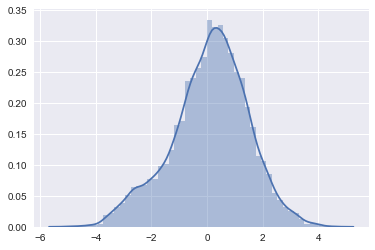

In [205]:
sns.distplot(res.resid)

In [159]:
estimate = data_4

drop = ['Unnamed: 0',
'STOP_LAT_x',
'STOP_LON_x',
'STOP_LAT_y',
'STOP_LON_y',
'geometry',
'index_right',
'ALAND00',
'AWATER00',
'COUNTYFP00',
'CTIDFP00',
'NAME00',
'TRACTCE00',
'Id',
'Id2',
'Geography',
'geometry_a',
'geometry_e',
'geometry_f',
'STOP_LAT',
'STOP_LON',
'FID_1']


change = ['Average Hourly Price',
'Count_',
'EDHLTH_RAC_SCALED',
'EDHLTH_WAC_SCALED',
'EMP_RAC_SCALED',
'EMP_WAC_SCALED',
'HOUSING_09_SCALED',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'OTHER_RAC_SCALED',
'OTHER_WAC_SCALED',
'PER_HH_0VEH',
'PER_INCOME_0-15',
'PER_INCOME_100+',
'PER_INCOME_15-50',
'PER_INCOME_50-100',
'PRICE12HR',
'PRICE1HR',
'PRICE2HR',
'PRICE3HR',
'PRICE4HR',
'PRICEDAY',
'PRICEDAYDISCOUNT',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)',
'parking_rate']

changes = ['PARK_HOURLY_AVG_ON',
'TRANSBAY',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'HOUSING_09_DEN',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'PARK_12_HR_OFF_PUB',
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'PARK_DAY_OFF_PUB',
'PARK_DAY_DISCOUNT_OFF_PUB',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'AVG_TT_TO_WORK_MINUTES',
'PARKING_RATE_OFF_RESIDENTIAL']



fill = ['BART_FROMS','BART_TOS','MUNI_RAIL_ALIGHTINGS','MUNI_RAIL_BOARDINGS','CALTRAIN_OFF','CALTRAIN_ON','NUM_BUS_STOPS']

look = ['EMP_WAC_DEN','LEISER_RAC_DEN','LEISER_WAC_DEN','OTHER_RAC_DEN','OTHER_WAC_DEN','RETAIL_RAC_DEN','RETAIL_WAC_DEN','ON']

log_change = ['PARK_12_HR_OFF_PUB',
'BIKE_BOARDINGS',
'BIKE_ALIGHTINGS',
'BIKE_AVG',     
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'AVG_BART',
'AVG_HH_SIZE',
'AVG_TT_TO_WORK_MINUTES',
'BART_FROMS',
'BART_TOS',
'CALTRAIN_AVG',
'CALTRAIN_OFF',
'CALTRAIN_ON',
'CAPACITY',
'CROWDED',
'CROWDHOURS',
'PARK_DAY_DISCOUNT_OFF_PUB',
'PARK_DAY_OFF_PUB',
'DWELL',
'DWELL_S',
'EDD_EMP',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'FARE',
'FREQ_S',
'FULLFARE_REV',
'HEADWAY_S',
'HH_DEN_ACS',
'PARK_HOURLY_AVG_ON',
'HOUSING_09_DEN',
'HU_DEN_ACS',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'MUNI_RAIL_ALIGHTINGS',
'MUNI_RAIL_AVG',
'MUNI_RAIL_BOARDINGS',
'NUM_BUS_STOPS',
'OCC_RATE',
'OFF',
'ON',
'ONTIME5',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'PARKING_RATE_OFF_RESIDENTIAL',
'PASSDELAY_ARR',
'PASSDELAY_DEP',
'PASSHOURS',
'PASSMILES',
'POP_DEN_ACS',
'RDBRDNGS',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'RUNSPEED',
'RUNSPEED_S',
'RUNTIME',
'RUNTIME_S',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'TOTSPEED',
'TOTSPEED_S',
'TOTTIME',
'TOTTIME_S',
'Total_Housing_Units',
'Total_Pop',
'VAC_RATE',
'VC',
'WAITHOURS']




def rename_column(old_columns,new_columns,df):
    num = len(old_columns)
    count = 0
    while count < num:
        df[new_columns[count]] = df[old_columns[count]]
        df = df.drop(old_columns[count],axis = 1)
        
        count = count + 1
    return df
    
    
def check(value):
    if value == 'N':
        value = ''
    else:
        value = value
    return value
    
    

estimate['FREQ_S'] = 1 / (estimate['HEADWAY_S'] / 60.0)
estimate['NUM_BUS_STOPS'] = estimate['NUM_BUS_STOPS'] - 1

estimate.RUNSPEED = estimate.RUNSPEED.clip(upper = 40)
estimate.RUNSPEED = estimate.TOTSPEED.clip(upper = 40)

estimate = estimate.drop(drop,axis = 1)

for column in fill:
    estimate[column] = estimate[column].fillna(0)
    

    
estimate = rename_column(change,changes,estimate)


estimate['EXCLUDE'] = 0
count = 0
for column in look:
    while count < len(estimate[column]):
        if np.isnan(estimate[column][count]):
                print('Got One')
                estimate['EXCLUDE'][count] = 1
        count = count + 1
        
        
data = estimate[estimate['EXCLUDE'] == 0]

data['AVG_RIDE'] = (data.ON + data.OFF)/2
data['LOG_RIDERS'] = np.log(data.AVG_RIDE + 1)

data['AVG_BART'] = (data['BART_FROMS']+data['BART_TOS'])/2
data['CALTRAIN_AVG'] = (data.CALTRAIN_OFF + data.CALTRAIN_ON)/2
data['MUNI_RAIL_AVG'] = (data.MUNI_RAIL_ALIGHTINGS + data.MUNI_RAIL_BOARDINGS)/2
data['BIKE_AVG'] = (data.BIKE_ALIGHTINGS + data.BIKE_BOARDINGS)/2

data.AVG_TT_TO_WORK_MINUTES = data.AVG_TT_TO_WORK_MINUTES.convert_objects(convert_numeric = True)


for column in log_change:
    data[column + '_LOG'] = data[column].apply(lambda value: np.log(value + 1))
    

data['DIST_FROM_LAST_STOP'] = data['SERVMILES_S'] / (data['FREQ_S']*24)

data['DIST_FROM_LAST_STOP_LOG'] = data['DIST_FROM_LAST_STOP'].apply(lambda value: np.log(value + 1))

data['SERVMILES_S_LOG'] = data['SERVMILES_S'].apply(lambda x : np.log(x + 1))
    
data['EOL_SOL'] = data['EOL'] + data['SOL']

data['CAL_STATION'] = np.where(data['CALTRAIN_AVG'] > 0,1,0)
data['CLOSE_STOP'] = np.where(data['DIST_FROM_LAST_STOP'] < 0.2, 1,0)

data['LIMITED'] = 0
data['EXPRESS'] = 0

data = data.apply(lambda x : set_routes(x,limited,express),axis = 1)

Got One
Got One
Got One
Got One


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\

NameError: ("name 'set_routes' is not defined", 'occurred at index 0')

In [ ]:
data.head()

In [161]:
# Check the 2009 Quarter Buffer Data for the same 2009 Tenth Buffer Model
# -- Looks good!

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + LIMITED \
                       + EXPRESS \
                       + ONTIME5 \
                       + TRANSBAY \
                       + MUNI_RAIL_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Tue, 18 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:25:00   Log-Likelihood:                -26990.
No. Observations:               16938   AIC:                         5.400e+04
Df Residuals:                   16926   BIC:                         5.410e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

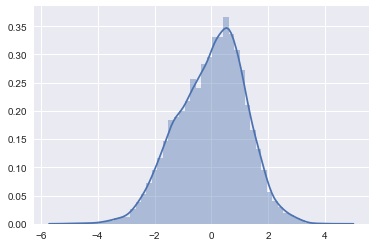

In [162]:
sns.distplot(res.resid)

In [163]:
estimate = data_3

drop = ['Unnamed: 0',
'STOP_LAT_x',
'STOP_LON_x',
'STOP_LAT_y',
'STOP_LON_y',
'geometry',
'index_right',
'ALAND00',
'AWATER00',
'COUNTYFP00',
'CTIDFP00',
'NAME00',
'TRACTCE00',
'Id',
'Id2',
'Geography',
'geometry_a',
'geometry_e',
'geometry_f',
'STOP_LAT',
'STOP_LON',
'FID_1']


change = ['Average Hourly Price',
'Count_',
'EDHLTH_RAC_SCALED',
'EDHLTH_WAC_SCALED',
'EMP_RAC_SCALED',
'EMP_WAC_SCALED',
'HOUSING_09_SCALED',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'OTHER_RAC_SCALED',
'OTHER_WAC_SCALED',
'PER_HH_0VEH',
'PER_INCOME_0-15',
'PER_INCOME_100+',
'PER_INCOME_15-50',
'PER_INCOME_50-100',
'PRICE12HR',
'PRICE1HR',
'PRICE2HR',
'PRICE3HR',
'PRICE4HR',
'PRICEDAY',
'PRICEDAYDISCOUNT',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)',
'parking_rate']

changes = ['PARK_HOURLY_AVG_ON',
'TRANSBAY',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'HOUSING_09_DEN',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'PARK_12_HR_OFF_PUB',
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'PARK_DAY_OFF_PUB',
'PARK_DAY_DISCOUNT_OFF_PUB',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'AVG_TT_TO_WORK_MINUTES',
'PARKING_RATE_OFF_RESIDENTIAL']



fill = ['BART_FROMS','BART_TOS','MUNI_RAIL_ALIGHTINGS','MUNI_RAIL_BOARDINGS','CALTRAIN_OFF','CALTRAIN_ON','NUM_BUS_STOPS']

look = ['EMP_WAC_DEN','LEISER_RAC_DEN','LEISER_WAC_DEN','OTHER_RAC_DEN','OTHER_WAC_DEN','RETAIL_RAC_DEN','RETAIL_WAC_DEN','ON']

log_change = ['PARK_12_HR_OFF_PUB',
'BIKE_BOARDINGS',
'BIKE_ALIGHTINGS',
'BIKE_AVG',     
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'AVG_BART',
'AVG_HH_SIZE',
'AVG_TT_TO_WORK_MINUTES',
'BART_FROMS',
'BART_TOS',
'CALTRAIN_AVG',
'CALTRAIN_OFF',
'CALTRAIN_ON',
'CAPACITY',
'CROWDED',
'CROWDHOURS',
'PARK_DAY_DISCOUNT_OFF_PUB',
'PARK_DAY_OFF_PUB',
'DWELL',
'DWELL_S',
'EDD_EMP',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'FARE',
'FREQ_S',
'FULLFARE_REV',
'HEADWAY_S',
'HH_DEN_ACS',
'PARK_HOURLY_AVG_ON',
'HOUSING_09_DEN',
'HU_DEN_ACS',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'MUNI_RAIL_ALIGHTINGS',
'MUNI_RAIL_AVG',
'MUNI_RAIL_BOARDINGS',
'NUM_BUS_STOPS',
'OCC_RATE',
'OFF',
'ON',
'ONTIME5',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'PARKING_RATE_OFF_RESIDENTIAL',
'PASSDELAY_ARR',
'PASSDELAY_DEP',
'PASSHOURS',
'PASSMILES',
'POP_DEN_ACS',
'RDBRDNGS',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'RUNSPEED',
'RUNSPEED_S',
'RUNTIME',
'RUNTIME_S',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'TOTSPEED',
'TOTSPEED_S',
'TOTTIME',
'TOTTIME_S',
'Total_Housing_Units',
'Total_Pop',
'VAC_RATE',
'VC',
'WAITHOURS']




def rename_column(old_columns,new_columns,df):
    num = len(old_columns)
    count = 0
    while count < num:
        df[new_columns[count]] = df[old_columns[count]]
        df = df.drop(old_columns[count],axis = 1)
        
        count = count + 1
    return df
    
    
def check(value):
    if value == 'N':
        value = ''
    else:
        value = value
    return value
    
    

estimate['FREQ_S'] = 1 / (estimate['HEADWAY_S'] / 60.0)
estimate['NUM_BUS_STOPS'] = estimate['NUM_BUS_STOPS'] - 1

estimate.RUNSPEED = estimate.RUNSPEED.clip(upper = 40)
estimate.RUNSPEED = estimate.TOTSPEED.clip(upper = 40)

estimate = estimate.drop(drop,axis = 1)

for column in fill:
    estimate[column] = estimate[column].fillna(0)
    

    
estimate = rename_column(change,changes,estimate)


estimate['EXCLUDE'] = 0
count = 0
for column in look:
    while count < len(estimate[column]):
        if np.isnan(estimate[column][count]):
                print('Got One')
                estimate['EXCLUDE'][count] = 1
        count = count + 1
        
        
data = estimate[estimate['EXCLUDE'] == 0]

data['AVG_RIDE'] = (data.ON + data.OFF)/2
data['LOG_RIDERS'] = np.log(data.AVG_RIDE + 1)

data['AVG_BART'] = (data['BART_FROMS']+data['BART_TOS'])/2
data['CALTRAIN_AVG'] = (data.CALTRAIN_OFF + data.CALTRAIN_ON)/2
data['MUNI_RAIL_AVG'] = (data.MUNI_RAIL_ALIGHTINGS + data.MUNI_RAIL_BOARDINGS)/2
data['BIKE_AVG'] = (data.BIKE_ALIGHTINGS + data.BIKE_BOARDINGS)/2

data.AVG_TT_TO_WORK_MINUTES = data.AVG_TT_TO_WORK_MINUTES.convert_objects(convert_numeric = True)


for column in log_change:
    data[column + '_LOG'] = data[column].apply(lambda value: np.log(value + 1))
    

data['DIST_FROM_LAST_STOP'] = data['SERVMILES_S'] / (data['FREQ_S']*24)

data['DIST_FROM_LAST_STOP_LOG'] = data['DIST_FROM_LAST_STOP'].apply(lambda value: np.log(value + 1))

data['SERVMILES_S_LOG'] = data['SERVMILES_S'].apply(lambda x : np.log(x + 1))
    
data['EOL_SOL'] = data['EOL'] + data['SOL']


data['CAL_STATION'] = np.where(data['CALTRAIN_AVG'] > 0,1,0)
data['CLOSE_STOP'] = np.where(data['DIST_FROM_LAST_STOP'] < 0.2, 1,0)

data['LIMITED'] = 0
data['EXPRESS'] = 0

data = data.apply(lambda x : set_routes(x,limited,express),axis = 1)

Got One
Got One
Got One
Got One


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\

NameError: ("name 'set_routes' is not defined", 'occurred at index 0')

In [164]:
data.head()

,MONTH,DOW,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_ON,CALTRAIN_OFF,MUNI_RAIL_BOARDINGS,MUNI_RAIL_ALIGHTINGS,BIKE_ALIGHTINGS,BIKE_DOCKCOUNT,BIKE_BOARDINGS,NUM_BUS_STOPS,EDD_EMP,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_RAIL_AVG,BIKE_AVG,PARK_12_HR_OFF_PUB_LOG,BIKE_BOARDINGS_LOG,BIKE_ALIGHTINGS_LOG,BIKE_AVG_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,CAPACITY_LOG,CROWDED_LOG,CROWDHOURS_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FARE_LOG,FREQ_S_LOG,FULLFARE_REV_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,MUNI_RAIL_ALIGHTINGS_LOG,MUNI_RAIL_AVG_LOG,MUNI_RAIL_BOARDINGS_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_LOG,ON_LOG,ONTIME5_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,PASSDELAY_ARR_LOG,PASSDELAY_DEP_LOG,PASSHOURS_LOG,PASSMILES_LOG,POP_DEN_ACS_LOG,RDBRDNGS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_LOG,RUNSPEED_S_LOG,RUNTIME_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_LOG,TOTSPEED_S_LOG,TOTTIME_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,VC_LOG,WAITHOURS_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,EOL_SOL,CAL_STATION,CLOSE_STOP,LIMITED,EXPRESS
0,2009-10-01,1,SFMTA,016AX,0,3,22,18.0,13,2,0.0,13.0,3612,NORIEGA A EXP,3,48TH AVENUE,10.666667,2.0,CYRIL MAGNIN ST & MARKET ST,5TH ST NORTH&MARKET ST NW,0,1,1.0,-3.875743,-0.070542,0.0,49.476280,0.00,0.000000,0.00,49.476280,0.000,0.000,0.00,0.00,0.00,0.00,0.737434,258.292460,0.240741,0.240741,258.292460,0.000000,20.102898,23.016448,516.584921,287.502463,91.157255,0.0,21.049339,0.000000,0.0,189.0,0.000294,0.0,0.0,6317.0,4775.0,0.164817,0.835183,1.584002,129.001163,81.440025,97.511565,4772.0,4673.0,0.0,0.0,4136.0,2496.0,27935.0,130.0,29199.0,39.0,22121.0,5.625,350.0,0.0,386.550972,947.978749,2304.134103,23327.688165,5228.029117,389.488489,5105.395659,1347.669953,9952.476242,0.912738,0.650953,0.003761,0.278084,0.067202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.424689,7321.837516,29.4,0.320246,0,129.266601,4.869583,4722.5,0.0,3316.0,28567.0,NaN,10.281924,10.237671,10.260042,NaN,NaN,NaN,NaN,8.460305,0.949339,3.414443,8.449771,8.470730,0.0,0.0,0.0,5.247024,0.0,0.0,NaN,NaN,3.921504,0.0,10.004328,5.959847,6.855386,7.742894,10.057439,1.098612,1.89085,6.249174,2.456736,4.412071,5.860786,8.561981,4.590174,5.967398,8.538249,7.822845,8.106816,8.327726,3.688879,0.607144,0.215709,5.557957,0.552409,7.206874,9.205677,0.277818,4.523496,5.664704,3.049410,0.000000,4.867543,0.0,5.200841,8.898753,0.000000,0.000000,0.000000

In [165]:
# Check the 2009 Third Buffer Data for the same 2009 Tenth Buffer Model
# -- Looks good, but the tenth is better. 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + LIMITED \
                       + EXPRESS \
                       + ONTIME5 \
                       + TRANSBAY \
                       + MUNI_RAIL_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.294e+04
Date:                Tue, 18 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:25:52   Log-Likelihood:                -26911.
No. Observations:               16920   AIC:                         5.385e+04
Df Residuals:                   16908   BIC:                         5.394e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

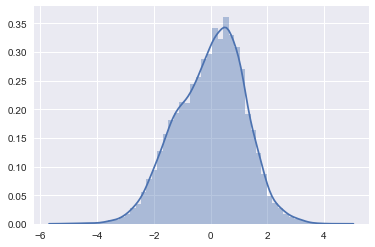

In [166]:
sns.distplot(res.resid)